In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
from numpy.linalg import inv 
from numpy.linalg import norm 

from functions import Rosenbrock, RosenbrockH, RosenbrockJ, Bowl, BowlJ, BowlH, Himmelblau, HimmelblauJ, HimmelblauH

# RESOURCES
# https://people.duke.edu/~ccc14/sta-663-2018/notebooks/S09G_Gradient_Descent_Optimization.html 

In [8]:
def GradientDescent(x0, F, J, tol, Nmax):

    ''' Lazy Newton = use only the inverse of the Jacobian for initial guess'''
    ''' inputs: x0 = initial guess, F = Function, J = Jacobian of F,tol = tolerance, Nmax = max its'''
    ''' Outputs: xstar= approximate root, ier = error message, its = num its'''

    # Checks to see if the function is already at the root
    if norm(F(x0)) == 0: 
        xstar = x0
        ier = 0
        its = 0
        return[xstar, ier, its, x0]

    
    xStep = [x0]
    for its in range(Nmax):
        # Evaluate J and compute its inverse     
        Jeval = J(x0)

        # Find the step length
        # alpha = 0.99
        dk = -Jeval
        alpha = backTrackingLineSearch(x0, F, Jeval, dk)

        # Update step
        p0 = Jeval

        # Calculate the step 
        x1 = x0 - alpha * p0
        xStep = xStep + [x1.tolist()]

    
        # If we found the root (to within the tolerance), return it and 0 for the error message
        if (norm(x1 - x0) < tol):
           xstar = x1
           ier = 0
           return[xstar, ier, its, xStep]
        
        x0 = x1
    
    # If we didn't find the root, return the step and an error of 1
    xstar = x1
    ier = 1
    return[xstar, ier, its, xStep]

def GradientDescentnD(x0, F, J, tol, Nmax):

    ''' Lazy Newton = use only the inverse of the Jacobian for initial guess'''
    ''' inputs: x0 = initial guess, F = Function, J = Jacobian of F,tol = tolerance, Nmax = max its'''
    ''' Outputs: xstar= approximate root, ier = error message, its = num its'''

    # Checks to see if the function is already at the root
    if norm(F(x0)) == 0: 
        xstar = x0
        ier = 0
        its = 0
        return


    for its in range(Nmax):
        # Evaluate J and compute its inverse     
        Jeval = J(x0)
        Jtranspose= np.transpose(Jeval)          
    
        # Evaluate F
        Feval = F(x0)

        # Find the step length
        alpha = 0.8 # THIS IS SOMETHING WE WANT TO FIND AN IMPLEMENTATION TO

        p0 = Jtranspose.dot(Feval)

        # Calculate the step 
        x1 = x0 - alpha * p0
    
        # If we found the root (to within the tolerance), 
        # return it and 0 for the error message
        if (norm(x1 - x0) < tol):
           xstar = x1
           ier = 0
           return[xstar, ier, its]
        
        x0 = x1
    
    # If we didn't find the root, return the step and an error of 1
    xstar = x1
    ier = 1
    return[xstar, ier, its]

def NewtonDescent(x0, F, J, H, tol, Nmax):

    ''' NewtonDescent: use only the inverse of the Jacobian for initial guess'''
    ''' inputs: x0 = initial guess, F = Function, J = Jacobian of F,tol = tolerance, Nmax = max its'''
    ''' Outputs: xstar= approximate root, ier = error message, its = num its'''

    # Checks to see if the function is already at the root
    if norm(F(x0)) == 0: 
        xstar = x0
        ier = 0
        its = 0
        return

    xStep = [x0]

    for its in range(Nmax):
        # Evaluate J    
        Jeval = J(x0)
        
        # Evaluates the Hessian and computes its inverse
        Heval = H(x0)   
        Hinv = inv(Heval)      

        # Find the step length
        p0 = Hinv.dot(Jeval)

        # alpha = backTrackingLineSearch(x0, F, Jeval, dk, p = 0.5, alpha=1, c=1e-4)
        alpha = backTrackingLineSearch(x0, F, Jeval, -p0)

        # Calculate the step 
        x1 = x0 - alpha*p0
        xStep = xStep + [x1.tolist()]
       
        # If we found the root (to within the tolerance), 
        # return it and 0 for the error message
        if (norm(x1 - x0) < tol):
           xstar = x1
           ier = 0
           return[xstar, ier, its, xStep]
        
        x0 = x1
    
    # If we didn't find the root, return the step and an error of 1
    xstar = x1
    ier = 1
    return[xstar, ier, its, xStep]

def backTrackingLineSearch(xk, F, grad_xk, dk, p = 0.5, c=0.01):

    ''' backTrackingLineSearch: calculate optimal alpha using Armijo condition'''
    ''' inputs: xk = step location, F = function, grad_xk = gradient of F, dk = descent direction, p = step length, c = Armijo constant'''
    ''' Outputs: alpha = step size'''

    # Initial guess for alpha
    alpha = 1.0
    
    # While the Amrijo condition is not satisfied, keep decreasing alpha
    while F(xk + alpha * dk) > F(xk) + c * alpha * np.dot(grad_xk, dk): 
        
        # Update alpha
        alpha = p * alpha

    # Return alpha
    return alpha

Root: [1. 1.] 
	 Number of iterations: 33354
Root: [1. 1.] 
	 Number of iterations: 26


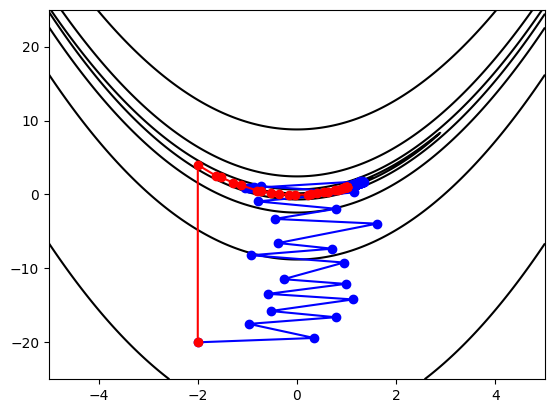

In [9]:
# Initial conditions and parameters
x0 = [-2, -20]
tol = 1e-16
Nmax = 100000

root, error, iterations, GDSteps = GradientDescent(x0, Rosenbrock, RosenbrockJ, tol, Nmax)
print("Root:", root, "\n\t Number of iterations:", iterations)

root, error, iterations, NDSteps = NewtonDescent(x0, Rosenbrock, RosenbrockJ, RosenbrockH, tol, Nmax)
print("Root:", root, "\n\t Number of iterations:", iterations)

GDSteps = np.array(GDSteps)
NDSteps = np.array(NDSteps)

a = 5; b = 25;

# Grid for plotting the function
x = np.linspace(-a, a, 1000)
y = np.linspace(-b, b, 1000)
X, Y = np.meshgrid(x, y)

evalPoints = [X, Y]

# Plot of the Rosenbrock function 
plt.plot(GDSteps[:,0], GDSteps[:,1],
            color='blue',
            marker="o",
            zorder=1)
plt.plot(NDSteps[:,0], NDSteps[:,1],
            color='red',
            marker="o",
            zorder=1)
plt.contour(X, Y, Rosenbrock(evalPoints),
            levels=np.logspace(-a, a, 10),
            colors='black',
            zorder=0)
plt.show()

Root: [0. 0.] 
	 Number of iterations: 1
Root: [0. 0.] 
	 Number of iterations: 1


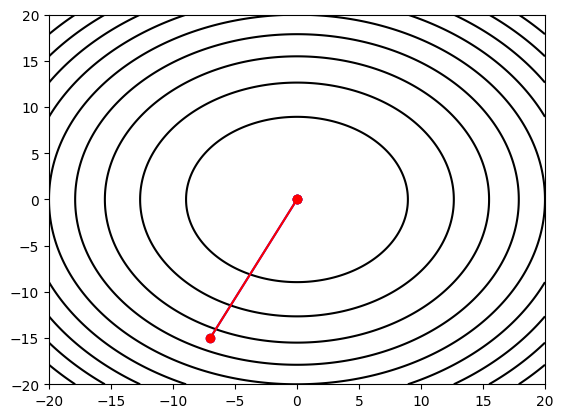

In [10]:
# Initial conditions and parameters
x0 = [-7, -15]
tol = 1e-16
Nmax = 100000

root, error, iterations, GDSteps = GradientDescent(x0, Bowl, BowlJ, tol, Nmax)
print("Root:", root, "\n\t Number of iterations:", iterations)

root, error, iterations, NDSteps = NewtonDescent(x0, Bowl, BowlJ, BowlH, tol, Nmax)
print("Root:", root, "\n\t Number of iterations:", iterations)

GDSteps = np.array(GDSteps)
NDSteps = np.array(NDSteps)

a = 20; b = 20;

# Grid for plotting the function
x = np.linspace(-a, a, 1000)
y = np.linspace(-b, b, 1000)
X, Y = np.meshgrid(x, y)

evalPoints = [X, Y]

# Plot of the Rosenbrock function 
plt.plot(GDSteps[:,0], GDSteps[:,1],
            color='blue',
            marker="o",
            zorder=1)
plt.plot(NDSteps[:,0], NDSteps[:,1],
            color='red',
            marker="o",
            zorder=1)
plt.contour(X, Y, Bowl(evalPoints),
            levels=10,
            colors='black',
            zorder=0)
plt.show()

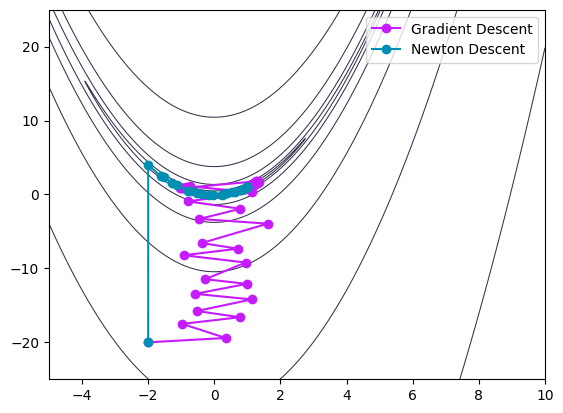

In [105]:
# Initial conditions and parameters
x0 = [-2, -20]
tol = 1e-16
Nmax = 100000

# root, error, iterations, GDSteps = GradientDescent(x0, Rosenbrock, RosenbrockJ, tol, Nmax)
# print("Root:", root, "\n\t Number of iterations:", iterations)

# root, error, iterations, NDSteps = NewtonDescent(x0, Rosenbrock, RosenbrockJ, RosenbrockH, tol, Nmax)
# print("Root:", root, "\n\t Number of iterations:", iterations)

GDSteps = np.array(GDSteps)
NDSteps = np.array(NDSteps)

a = 10; b = 25;

# Grid for plotting the function
x = np.linspace(-5, a, 1000)
y = np.linspace(-b, b, 1000)
X, Y = np.meshgrid(x, y)

evalPoints = [X, Y]

# Plot of the Rosenbrock function 
plt.plot(GDSteps[:,0], GDSteps[:,1],
            color='#c61aff',
            marker="o",
            zorder=1,
            label="Gradient Descent")
plt.plot(NDSteps[:,0], NDSteps[:,1],
            color='#008fb3',
            marker="o",
            zorder=1,
            label="Newton Descent")
plt.contour(X, Y, Rosenbrock(evalPoints),
            levels=np.logspace(0.5, 35, 40),
            colors='#33334d',
            linewidths=0.75,
            zorder=0)
plt.legend()
plt.show()

# # syntax for 3-D projection
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# surf = ax.plot_surface(X, Y, np.log(Rosenbrock(evalPoints)), cmap=cm.RdPu_r,
#                        linewidth=10, antialiased=False)
# plt.show()

Root: [ 3.58442834 -1.84812653] 
	 Number of iterations: 87
Root: [3. 2.] 
	 Number of iterations: 11
Root: [ 3.58442834 -1.84812653] 
	 Number of iterations: 84
Root: [ 3.58442834 -1.84812653] 
	 Number of iterations: 11


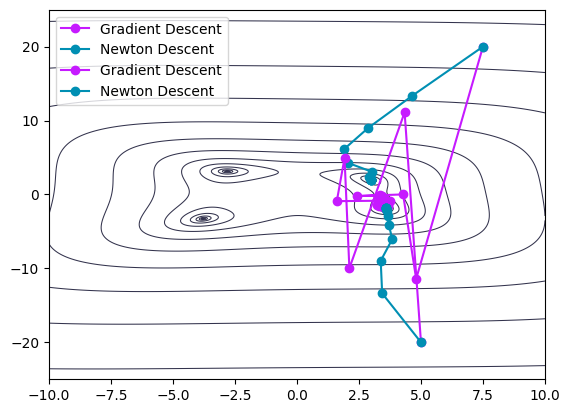

In [114]:
# Initial conditions and parameters
a = 10; b = 25;

# Grid for plotting the function
x = np.linspace(-10, a, 1000)
y = np.linspace(-b, b, 1000)
X, Y = np.meshgrid(x, y)

evalPoints = [X, Y]

plt.contour(X, Y, Himmelblau(evalPoints),
            levels=np.logspace(-20, 6, 50),
            colors='#33334d',
            linewidths=0.75,
            zorder=0)


# x0 = [-4, -20]; tol = 1e-16; Nmax = 100000;
# root, error, iterations, GDSteps = GradientDescent(x0, Himmelblau, HimmelblauJ, tol, Nmax)
# print("Root:", root, "\n\t Number of iterations:", iterations)

# root, error, iterations, NDSteps = NewtonDescent(x0, Himmelblau, HimmelblauJ, HimmelblauH, tol, Nmax)
# print("Root:", root, "\n\t Number of iterations:", iterations)

# GDSteps = np.array(GDSteps)
# NDSteps = np.array(NDSteps)

# # Plot of the Rosenbrock function 
# plt.plot(GDSteps[:,0], GDSteps[:,1],
#             color='#c61aff',
#             marker="o",
#             zorder=1,
#             label="Gradient Descent")
# plt.plot(NDSteps[:,0], NDSteps[:,1],
#             color='#008fb3',
#             marker="o",
#             zorder=1,
#             label="Newton Descent")



# x0 = [-5, 20]; tol = 1e-16; Nmax = 100000;
# root, error, iterations, GDSteps = GradientDescent(x0, Himmelblau, HimmelblauJ, tol, Nmax)
# print("Root:", root, "\n\t Number of iterations:", iterations)

# root, error, iterations, NDSteps = NewtonDescent(x0, Himmelblau, HimmelblauJ, HimmelblauH, tol, Nmax)
# print("Root:", root, "\n\t Number of iterations:", iterations)

# GDSteps = np.array(GDSteps)
# NDSteps = np.array(NDSteps)

# # Plot of the Rosenbrock function 
# plt.plot(GDSteps[:,0], GDSteps[:,1],
#             color='#c61aff',
#             marker="o",
#             zorder=1,
#             label="Gradient Descent")
# plt.plot(NDSteps[:,0], NDSteps[:,1],
#             color='#008fb3',
#             marker="o",
#             zorder=1,
#             label="Newton Descent")


x0 = [7.5, 20]; tol = 1e-16; Nmax = 100000;
root, error, iterations, GDSteps = GradientDescent(x0, Himmelblau, HimmelblauJ, tol, Nmax)
print("Root:", root, "\n\t Number of iterations:", iterations)

root, error, iterations, NDSteps = NewtonDescent(x0, Himmelblau, HimmelblauJ, HimmelblauH, tol, Nmax)
print("Root:", root, "\n\t Number of iterations:", iterations)

GDSteps = np.array(GDSteps)
NDSteps = np.array(NDSteps)

# Plot of the Rosenbrock function 
plt.plot(GDSteps[:,0], GDSteps[:,1],
            color='#c61aff',
            marker="o",
            zorder=1,
            label="Gradient Descent")
plt.plot(NDSteps[:,0], NDSteps[:,1],
            color='#008fb3',
            marker="o",
            zorder=1,
            label="Newton Descent")


x0 = [5, -20]; tol = 1e-16; Nmax = 100000;
root, error, iterations, GDSteps = GradientDescent(x0, Himmelblau, HimmelblauJ, tol, Nmax)
print("Root:", root, "\n\t Number of iterations:", iterations)

root, error, iterations, NDSteps = NewtonDescent(x0, Himmelblau, HimmelblauJ, HimmelblauH, tol, Nmax)
print("Root:", root, "\n\t Number of iterations:", iterations)

GDSteps = np.array(GDSteps)
NDSteps = np.array(NDSteps)

# Plot of the Rosenbrock function 
plt.plot(GDSteps[:,0], GDSteps[:,1],
            color='#c61aff',
            marker="o",
            zorder=1,
            label="Gradient Descent")
plt.plot(NDSteps[:,0], NDSteps[:,1],
            color='#008fb3',
            marker="o",
            zorder=1,
            label="Newton Descent")




plt.legend()
plt.show()

# # syntax for 3-D projection
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# surf = ax.plot_surface(X, Y, np.log(Himmelblau(evalPoints)), cmap=cm.RdPu_r,
#                        linewidth=10, antialiased=False)
# plt.show()